In [1]:
%matplotlib inline
import pandas as pd
import requests
import json
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
plt.rcParams["figure.figsize"] = [50, 25]

Loading Bitcoin closing price from https://api.coindesk.com/v1/bpi/historical/close.json?index=usd&start=2013-09-01&end=2017-09-01
Number of elements: 1462


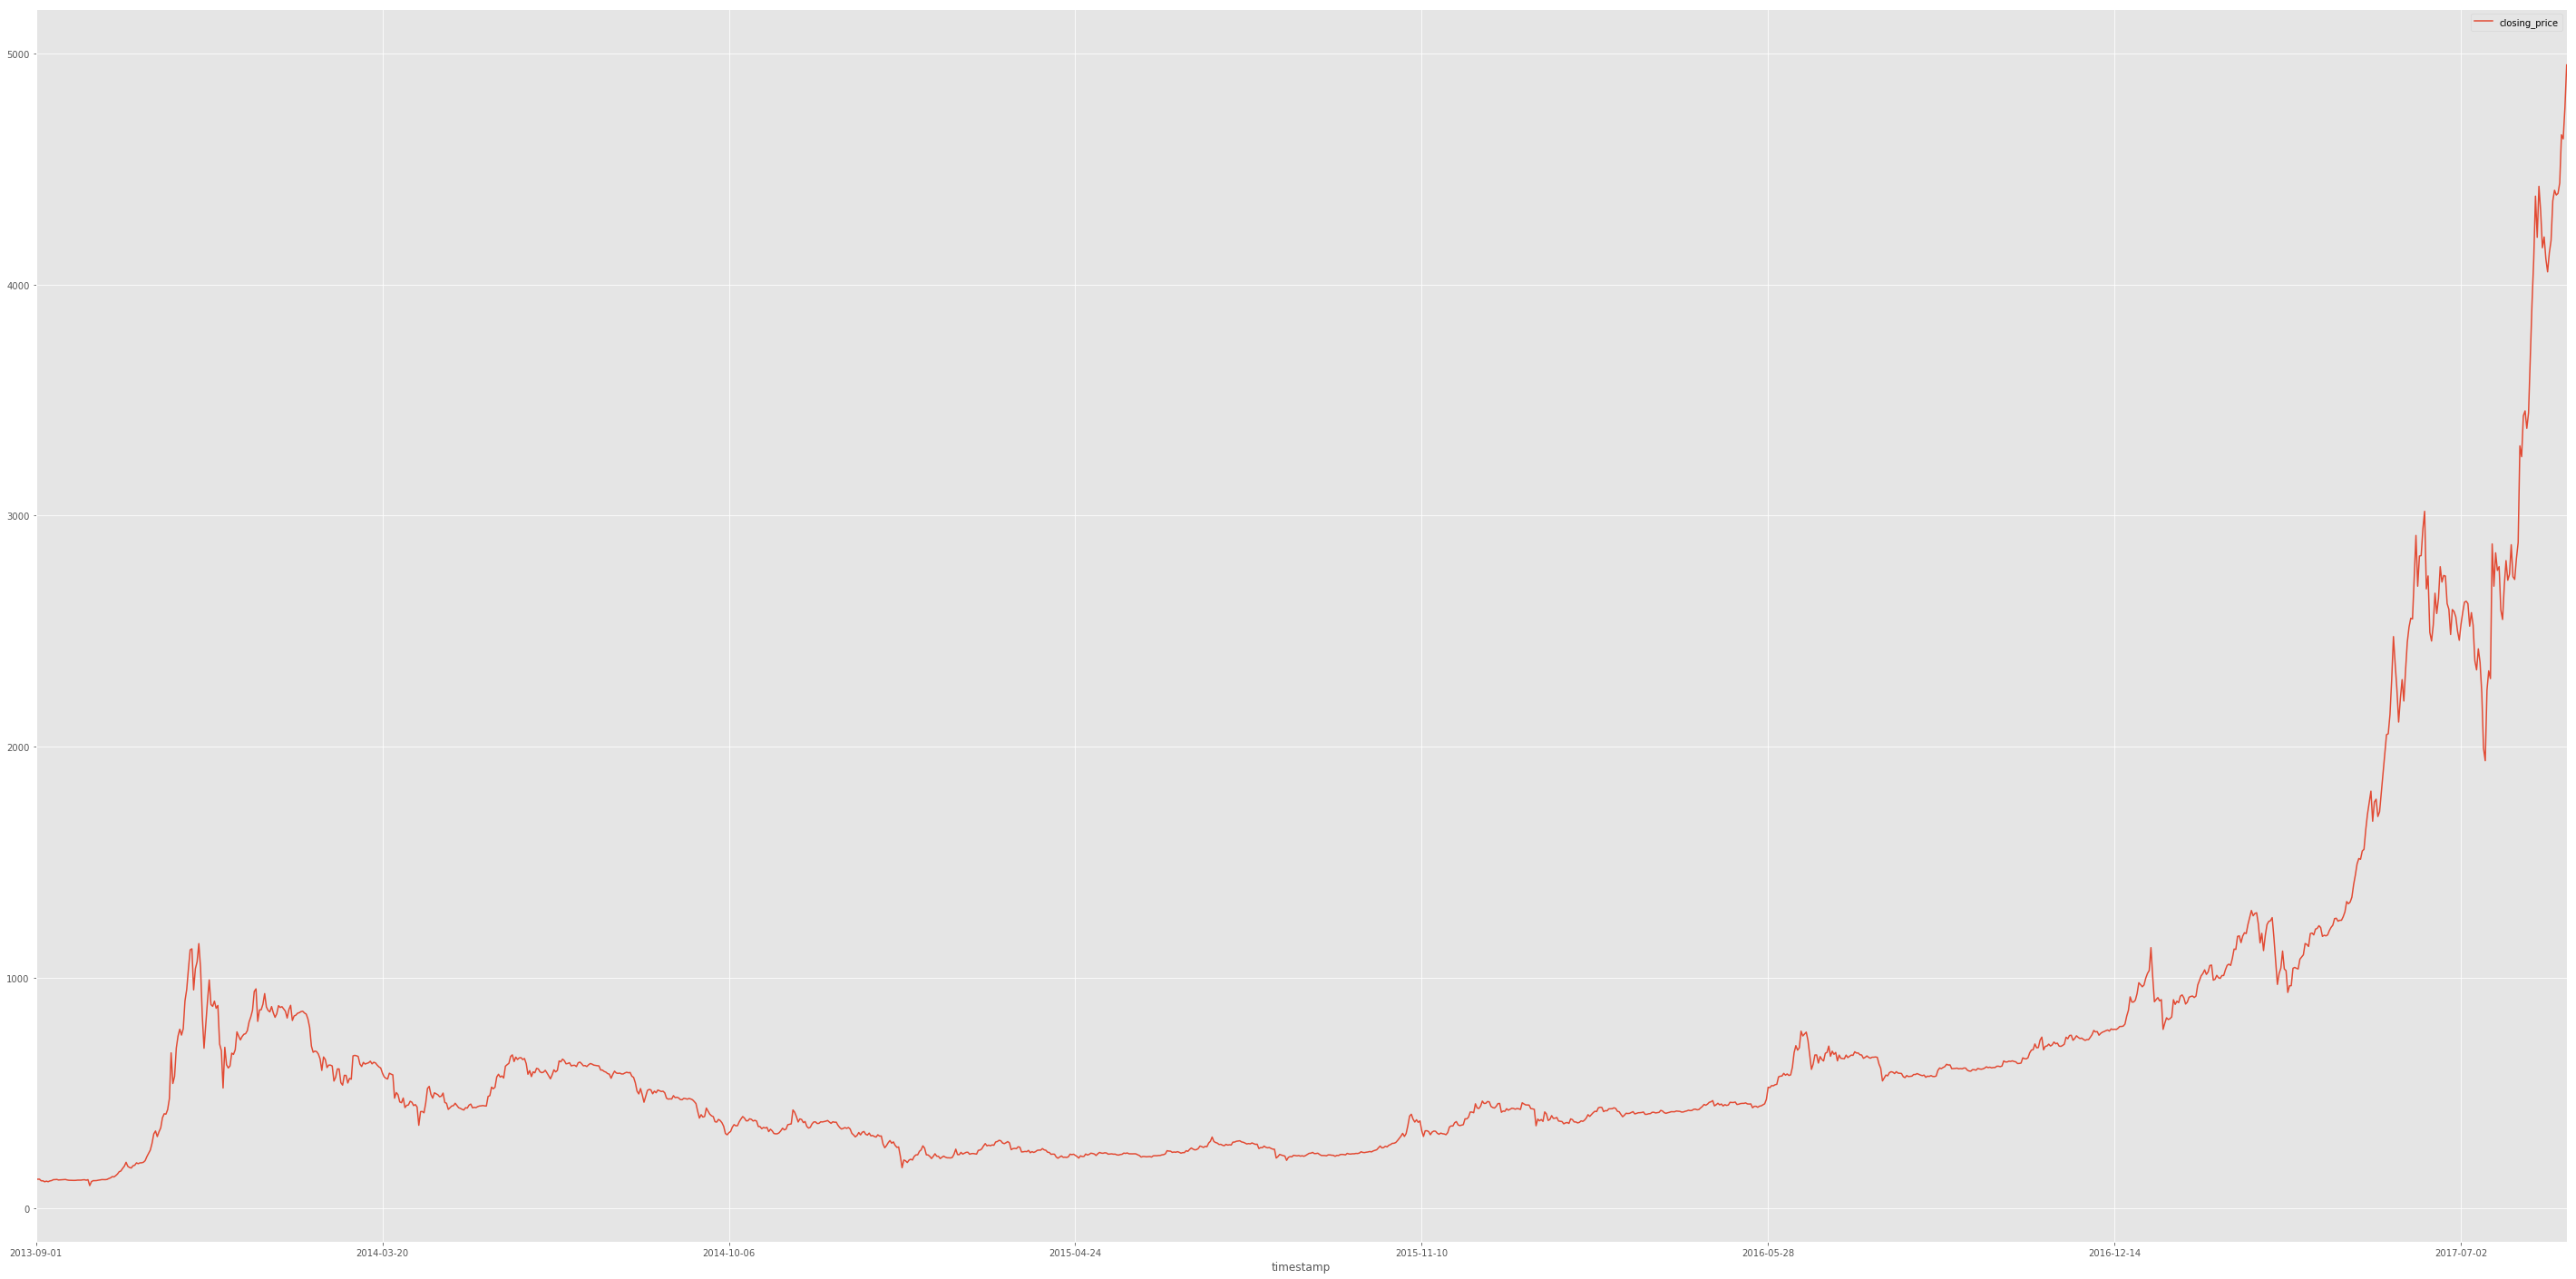

In [2]:
url_template = "https://api.coindesk.com/v1/bpi/historical/close.json?index=%s&start=%s&end=%s"
url = url_template % ("usd", "2013-09-01", "2017-09-01")
print("Loading Bitcoin closing price from %s" % url)
response = json.loads(requests.get(url).content)
df_bc = pd.DataFrame.from_dict(response['bpi'], orient="index")
df_bc.columns = ["closing_price"]
df_bc.index.name = "timestamp"
print("Number of elements: %s" % df_bc.size)
df_bc.head(10)
df_bc.plot.line()

In [3]:
def Bolinger_Bands(stock_price, window_size, num_of_std):

    rolling_mean = stock_price.rolling(window=window_size).mean()
    rolling_std  = stock_price.rolling(window=window_size).std()
    upper_band = rolling_mean + (rolling_std*num_of_std)
    lower_band = rolling_mean - (rolling_std*num_of_std)

    return rolling_mean, upper_band, lower_band

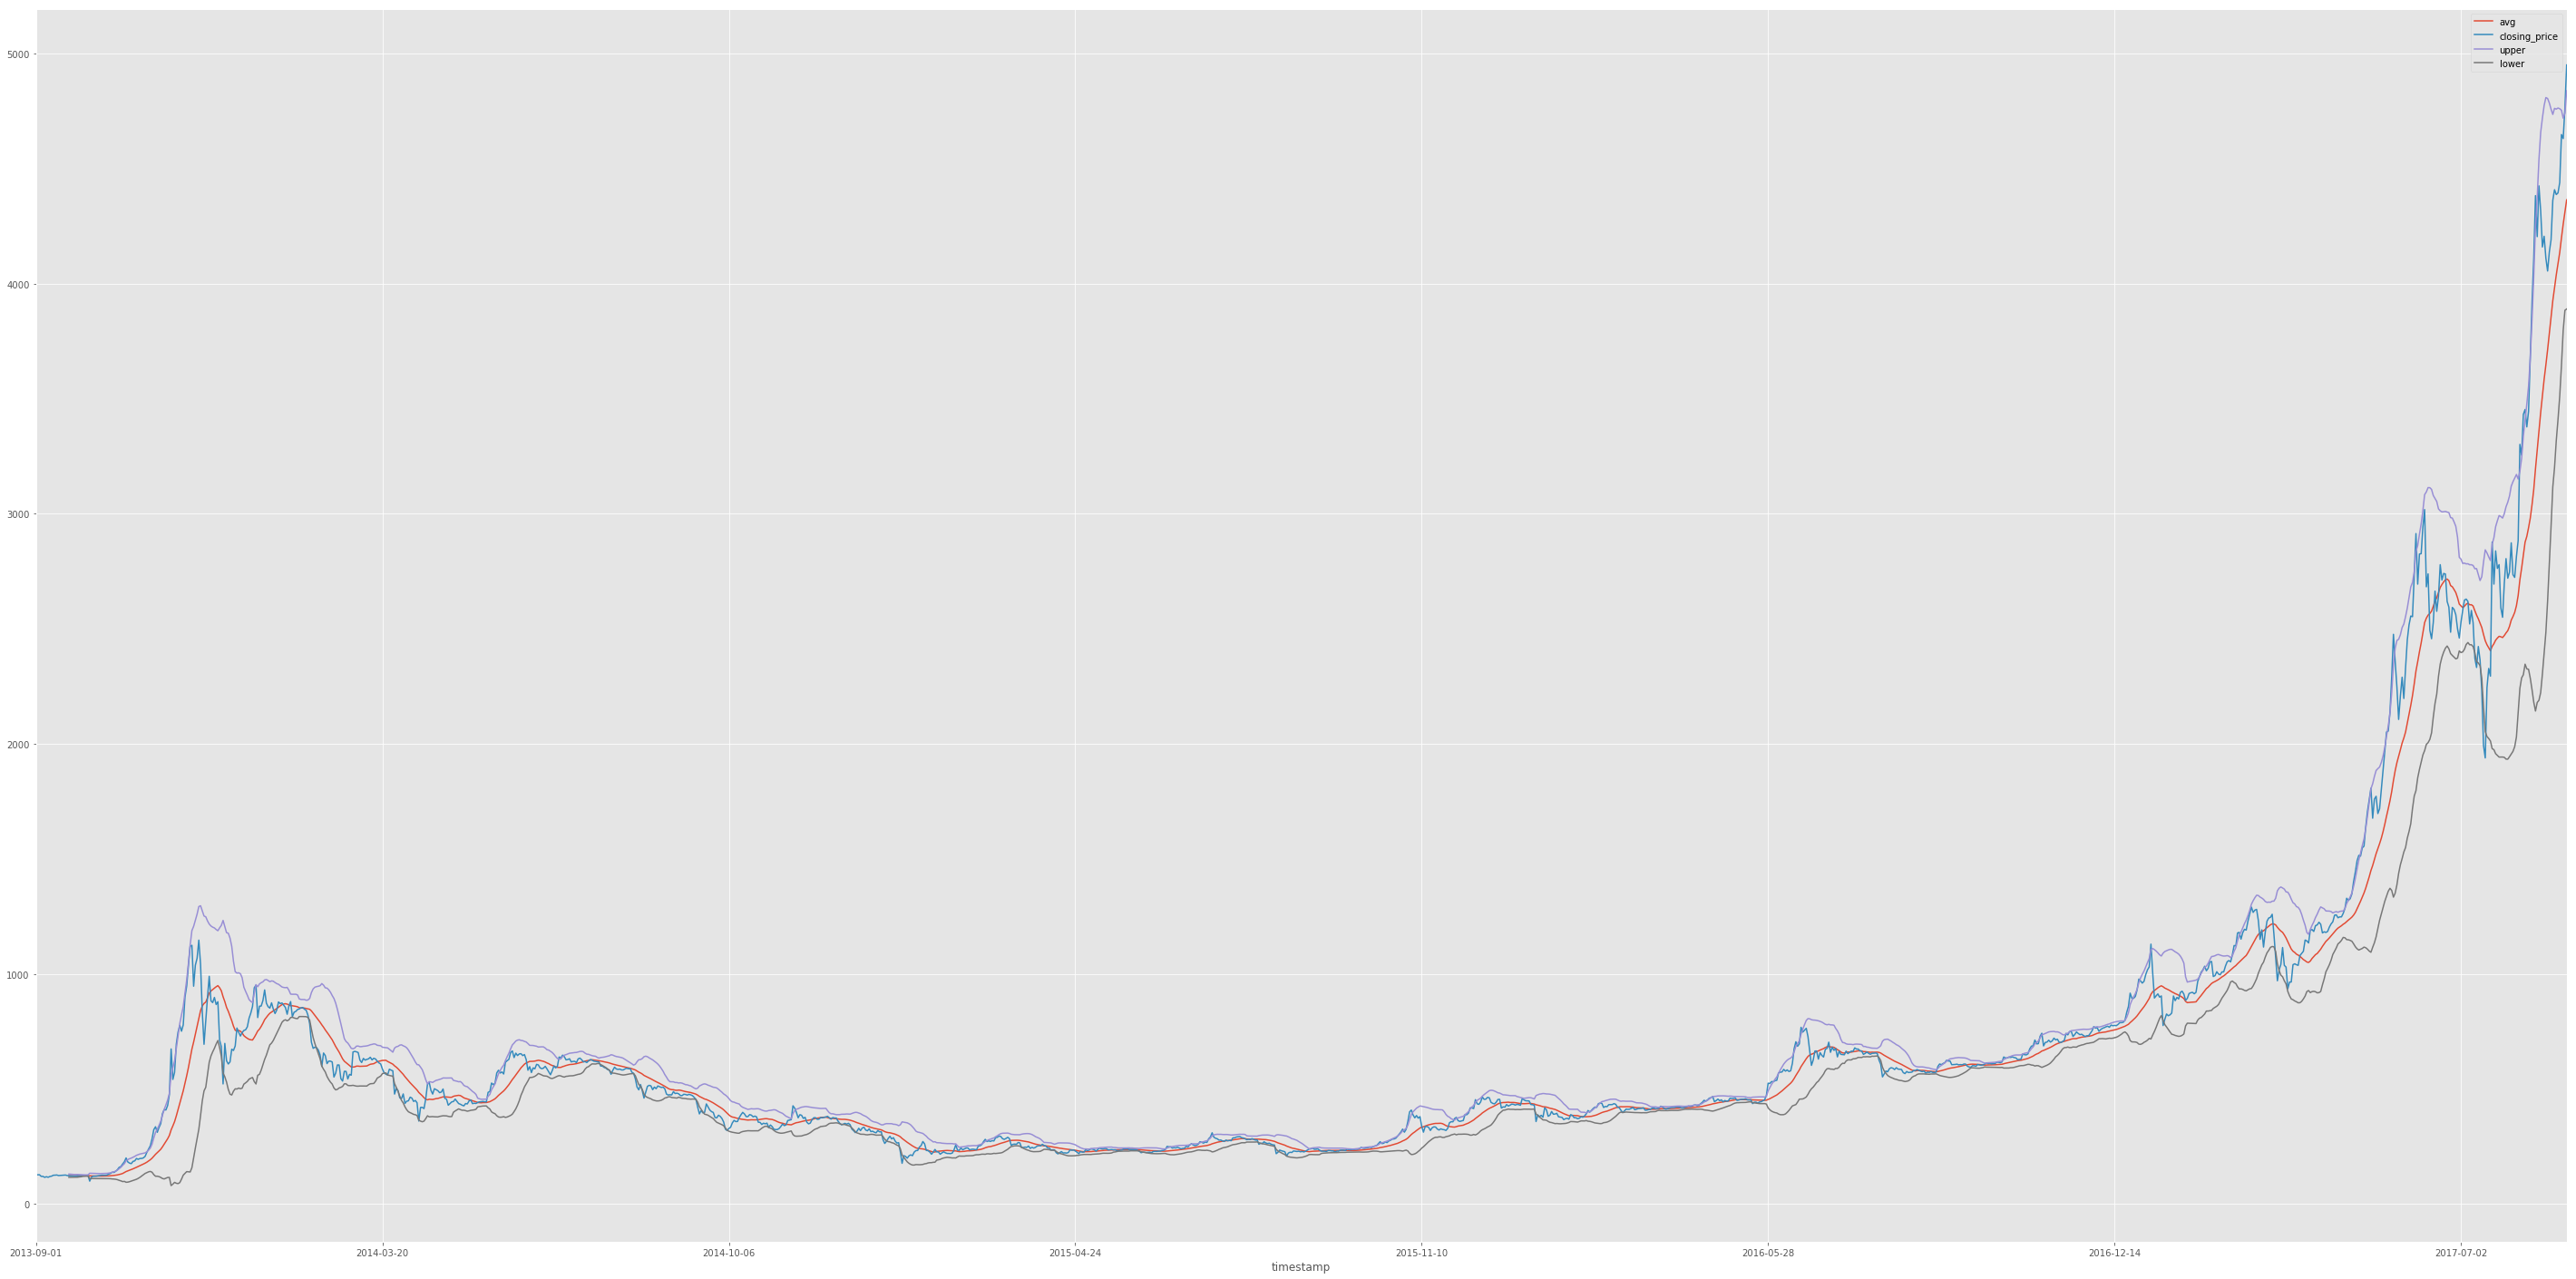

In [4]:
rolling_avg_price, upper_band, lower_band = Bolinger_Bands(df_bc, 20, 2)
upper_band.columns = ["upper"]
lower_band.columns = ["lower"]
rolling_avg_price.columns = ["avg"]
df_all = rolling_avg_price.join([df_bc, upper_band, lower_band], how="inner")
df_all.plot.line()